In [20]:
import pandas_profiling as ppf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [21]:
## check the raw data
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [22]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

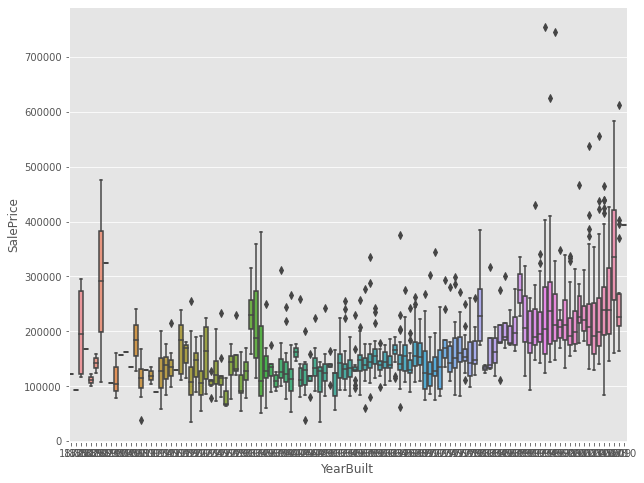

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(train.YearBuilt, train.SalePrice)

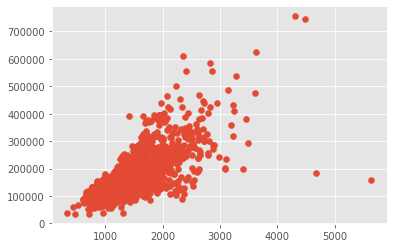

In [26]:
plt.scatter(x=train.GrLivArea,y=train.SalePrice)

In [81]:
train2 = train.drop(train[(train.GrLivArea>4000)&(train.SalePrice<300000)].index)
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1199 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1458 non-null   object 
 8   LandContour    1458 non-null   object 
 9   Utilities      1458 non-null   object 
 10  LotConfig      1458 non-null   object 
 11  LandSlope      1458 non-null   object 
 12  Neighborhood   1458 non-null   object 
 13  Condition1     1458 non-null   object 
 14  Condition2     1458 non-null   object 
 15  BldgType       1458 non-null   object 
 16  HouseStyle     1458 non-null   object 
 17  OverallQual    1458 non-null   int64  
 18  OverallC

In [82]:
full_df = pd.concat([train2,test],ignore_index=True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2917 non-null   int64  
 1   MSSubClass     2917 non-null   int64  
 2   MSZoning       2913 non-null   object 
 3   LotFrontage    2431 non-null   float64
 4   LotArea        2917 non-null   int64  
 5   Street         2917 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2917 non-null   object 
 8   LandContour    2917 non-null   object 
 9   Utilities      2915 non-null   object 
 10  LotConfig      2917 non-null   object 
 11  LandSlope      2917 non-null   object 
 12  Neighborhood   2917 non-null   object 
 13  Condition1     2917 non-null   object 
 14  Condition2     2917 non-null   object 
 15  BldgType       2917 non-null   object 
 16  HouseStyle     2917 non-null   object 
 17  OverallQual    2917 non-null   int64  
 18  OverallC

In [83]:
#data cleaning
miss_val = full_df.isnull().sum()
miss_val[miss_val>0].sort_values(ascending=True)

Electrical         1
GarageArea         1
GarageCars         1
Exterior1st        1
Exterior2nd        1
KitchenQual        1
SaleType           1
TotalBsmtSF        1
BsmtFinSF1         1
BsmtUnfSF          1
BsmtFinSF2         1
Utilities          2
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtExposure      82
BsmtCond          82
GarageType       157
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
LotFrontage      486
FireplaceQu     1420
SalePrice       1459
Fence           2346
Alley           2719
MiscFeature     2812
PoolQC          2908
dtype: int64

In [84]:
col_str = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
col_num = ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
col_mode = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for i in col_str:
    full_df[i].fillna('None',inplace=True)
for i in col_num:
    full_df[i].fillna(0,inplace=True)
for i in col_mode:
    mod = full_df[i].mode()[0]
    full_df[i].fillna(mod,inplace=True)
full_df['LotFrontage'].fillna(np.mean(full_df['LotFrontage']),inplace=True)
full_df.isnull().sum()[full_df.isnull().sum()>0]

SalePrice    1459
dtype: int64

In [85]:
full_df.duplicated().sum()

0

In [86]:
## transform into number
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [96]:
full = full_df
full["Alley"] = lab.fit_transform(full.Alley)
full["PoolQC"] = lab.fit_transform(full.PoolQC)
full["MiscFeature"] = lab.fit_transform(full.MiscFeature)
full["Fence"] = lab.fit_transform(full.Fence)
full["FireplaceQu"] = lab.fit_transform(full.FireplaceQu)
full["GarageQual"] = lab.fit_transform(full.GarageQual)
full["GarageCond"] = lab.fit_transform(full.GarageCond)
full["GarageFinish"] = lab.fit_transform(full.GarageFinish)
full["GarageYrBlt"] = full["GarageYrBlt"].astype(str)
full["GarageYrBlt"] = lab.fit_transform(full.GarageYrBlt)
full["GarageType"] = lab.fit_transform(full.GarageType)
full["BsmtExposure"] = lab.fit_transform(full.BsmtExposure)
full["BsmtCond"] = lab.fit_transform(full.BsmtCond)
full["BsmtQual"] = lab.fit_transform(full.BsmtQual)
full["BsmtFinType2"] = lab.fit_transform(full.BsmtFinType2)
full["BsmtFinType1"] = lab.fit_transform(full.BsmtFinType1)
full["MasVnrType"] = lab.fit_transform(full.MasVnrType)
full["BsmtFinType1"] = lab.fit_transform(full.BsmtFinType1)
full["MSZoning"] = lab.fit_transform(full.MSZoning)
full["BsmtFullBath"] = lab.fit_transform(full.BsmtFullBath)
full["BsmtHalfBath"] = lab.fit_transform(full.BsmtHalfBath)
full["Utilities"] = lab.fit_transform(full.Utilities)
full["Functional"] = lab.fit_transform(full.Functional)
full["Electrical"] = lab.fit_transform(full.Electrical)
full["KitchenQual"] = lab.fit_transform(full.KitchenQual)
full["SaleType"] = lab.fit_transform(full.SaleType)
full["Exterior1st"] = lab.fit_transform(full.Exterior1st)
full["Exterior2nd"] = lab.fit_transform(full.Exterior2nd)
full2 = pd.get_dummies(full)

In [97]:
full2.drop('SalePrice',axis=1,inplace=True)

KeyError: "['SalePrice'] not found in axis"

In [98]:
full2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,3,65.0,8450,1,0,7,5,2003,2003,12,13,1,196.0,2,4,3,2,706.0,6,0.0,150.0,856.0,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,98,2,2.0,548.0,5,5,0,61,0,0,0,0,3,4,1,0,2,2008,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,2,20,3,80.0,9600,1,0,6,8,1976,1976,8,8,2,0.0,2,4,1,0,978.0,6,0.0,284.0,1262.0,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,68,2,2.0,460.0,5,5,298,0,0,0,0,0,3,4,1,0,5,2007,8,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,3,60,3,68.0,11250,1,0,7,5,2001,2002,12,13,1,162.0,2,4,2,2,486.0,6,0.0,434.0,920.0,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,96,2,2.0,608.0,5,5,0,42,0,0,0,0,3,4,1,0,9,2008,8,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
3,4,70,3,60.0,9550,1,0,7,5,1915,1970,13,15,2,0.0,4,1,3,0,216.0,6

In [108]:
full2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Columns: 183 entries, Id to SaleCondition_Partial
dtypes: float64(8), int64(52), uint8(123)
memory usage: 1.7 MB


In [137]:
## 我们自己写转化函数来做数据处理
from sklearn.base import BaseEstimator, TransformerMixin
class label(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        lab=LabelEncoder()
        X["YearBuilt"] = lab.fit_transform(X["YearBuilt"])
        X["YearRemodAdd"] = lab.fit_transform(X["YearRemodAdd"])
        return X

In [141]:
class skew_dummies(BaseEstimator, TransformerMixin):
    def __init__(self,skew=0.5):#偏度
        self.skew = skew
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X_numeric=X.select_dtypes(exclude=["object"])#而是去除了包含了对象数据类型，取出来绝大部分是数值型
        skewness = X_numeric.apply(lambda x: skew(x))#匿名函数，做成字典的形式
        skewness_features = skewness[abs(skewness) >= self.skew].index#通过条件来涮选出skew>=0.5的索引的条件，取到了全部数据，防止数据的丢失
        X[skewness_features] = np.log1p(X[skewness_features])#求对数，进一步让他更符合正态分布
        X = pd.get_dummies(X)##一键独热，独热编码，（试错经历）
        return X

In [138]:
## 修正偏度：
class skew_dummies(BaseEstimator,TransformerMixin):
    def __init__(self,skew=0.5):
        self.skew = skew
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X_numeric = X.select_dtypes(exclude=['object']) #选出数值型
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skwness[abs(skewness)>=self.skew].index
        X[skewness_features] = np.loglp(X[skewness_features])
        X = pd.get_dummies(X)
        return X

In [146]:
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
## Construct the pipeline
pipe = Pipeline([
    ('label',label()),
    ('skew_dummies',skew_dummies(skew=2)),
])

In [147]:
full3 = full.copy()
pipeline_data = pipe.fit_transform(full3)
pipeline_data.shape

(2917, 183)

In [148]:
pipeline_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,3,65.0,9.042040,1,0.0,7,5,110,53,12,13,1,5.283204,2,1.609438,3,2,706.0,1.94591,0.0,150.0,856.0,1.609438,856,854,0.0,1710,1,0.000000,2,1,3,0.693147,2,8,1.94591,0,3,1,98,2,2.0,548.0,1.791759,1.791759,0,4.127134,0.000000,0.0,0.0,0.0,1.386294,4,0.693147,0.000000,2,2008,2.197225,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,2,20,3,80.0,9.169623,1,0.0,6,8,83,26,8,8,2,0.000000,2,1.609438,1,0,978.0,1.94591,0.0,284.0,1262.0,1.609438,1262,0,0.0,1262,0,0.693147,2,0,3,0.693147,3,6,1.94591,1,5,1,68,2,2.0,460.0,1.791759,1.791759,298,0.000000,0.000000,0.0,0.0,0.0,1.386294,4,0.693147,0.000000,5,2007,2.197225,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,3,60,3,68.0,9.328212,1,0.0,7,5,108,52,12,13,1,5.093750,2,1.609438,2,2,486.0,1.94591,0.0,434.0,920.0,1.609438,920,866,0.0,1786,1,0.000000,2,1,3,0.693147,2,6,1.94591,1,5,1,96,2,2.0,608.0,1.791759,1.791759,0,3.761200,0.000000,0.0,0.0,0.0,1.386294,4,0.693147,0.00000

In [ ]:
#select the feature
#use wapper
from sklearn.linear_model import Lasso